11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9068 - loss: 0.3176 - val_accuracy: 0.9782 - val_loss: 0.0738
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9821 - loss: 0.0589 - val_accuracy: 0.9806 - val_loss: 0.0644
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9897 - loss: 0.0343 - val_accuracy: 0.9846 - val_loss: 0.0548
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusão:
 [[ 975    1    1    0    0    0    2    1    0    0]
 [   0 1127    2    1    0    2    2    0    1    0]
 [   1    2 1018    2    1    0    0    6    2    0]
 [   0    0    0 1004    0    3    0    0    3    0]
 [   0    1    4    0  960    0    0    0    4   13]
 [   1    0    0    6    0  883    1    0    1    0]
 [   4    2    2    0    3   15  931    0    1    0]
 [   1    2   10    3    0    0    0 1005    2    5]
 [   5    0    7   10    0    3    1    1  943    4]
 [   1    2    0    8    2    7    0    2    5  982]]


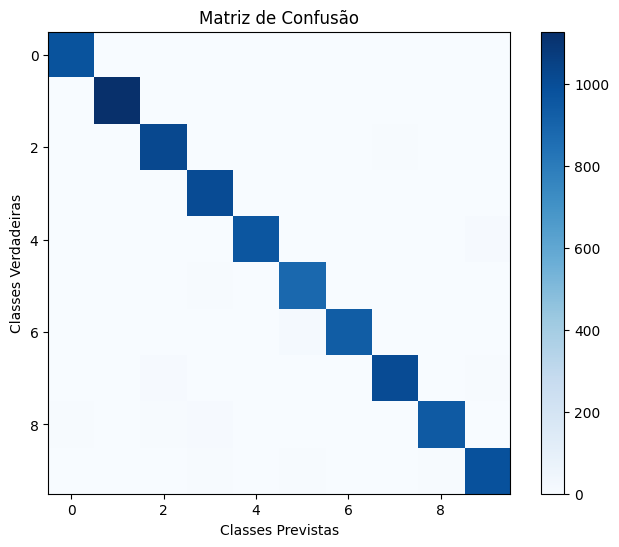

Acurácia: 1.00
Recall (Sensibilidade): 0.99
Especificidade: 1.00
Precisão: 0.99
F-Score: 0.99

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [1]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# 1. Carregar o dataset MNIST (como exemplo)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Pré-processamento dos dados
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Normalização
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0    # Normalização
y_train_categorico = tf.keras.utils.to_categorical(y_train, 10)
y_test_categorico = tf.keras.utils.to_categorical(y_test, 10)

# 2. Definir um modelo simples
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
model.fit(x_train, y_train_categorico, epochs=3, batch_size=32, validation_split=0.2)

# 3. Fazer previsões no conjunto de teste
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Converter probabilidades para classes previstas

# 4. Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", cm)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.colorbar()
plt.xlabel("Classes Previstas")
plt.ylabel("Classes Verdadeiras")
plt.show()

# 5. Calcular métricas (para problema binário ou generalizar para cada classe)
# Exemplo para uma classe específica (binário):
# Suponha que estamos interessados na classe "1"
TP = cm[1, 1]
TN = np.sum(cm) - (np.sum(cm[1, :]) + np.sum(cm[:, 1]) - TP)
FP = np.sum(cm[:, 1]) - TP
FN = np.sum(cm[1, :]) - TP

accuracy = (TP + TN) / np.sum(cm)
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
f_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Acurácia: {accuracy:.2f}")
print(f"Recall (Sensibilidade): {recall:.2f}")
print(f"Especificidade: {specificity:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"F-Score: {f_score:.2f}")

# 6. Relatório de classificação completo (multiclasse)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
